<a href="https://colab.research.google.com/github/ravi-gopalan/lstm_analyses/blob/master/lstm_prediction_WDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=69180599ab705640be257b41adc8f8041f70de712d4e073b9c6c194ad0669816
  Stored in directory: /root/.cache/pip/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
# Importing the libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
# Import yfinance
import yfinance as yf 

In [4]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [5]:
!git clone -l -s git://github.com/ravi-gopalan/lstm_analyses.git cloned-repository

Cloning into 'cloned-repository'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (30/30), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 30 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (30/30), 1.33 MiB | 13.12 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [6]:
!ls

cloned-repository  sample_data


In [0]:
def modify_features(df, window = 21, n_std = 2):
  df.drop(columns=['Adj Close'], inplace=True)
  #Calculate rolling mean and standard deviation using number of days set above
  roll_mean = df['Open'].rolling(window).mean()
  roll_std = df['Open'].rolling(window).std()
  df['rolling_mean'] = roll_mean
  #create two new DataFrame columns to hold values of upper and lower Bollinger bands
  df['bollinger_high'] = roll_mean + (roll_std * n_std)
  df['bollinger_low'] = roll_mean - (roll_std * n_std)
  return df

[*********************100%***********************]  1 of 1 downloaded


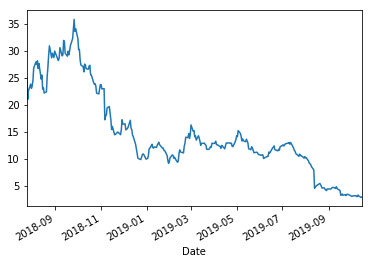

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 2018-07-25 to 2019-10-15
Data columns (total 8 columns):
Open              309 non-null float64
High              309 non-null float64
Low               309 non-null float64
Close             309 non-null float64
Volume            309 non-null int64
rolling_mean      289 non-null float64
bollinger_high    289 non-null float64
bollinger_low     289 non-null float64
dtypes: float64(7), int64(1)
memory usage: 21.7 KB


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2018-07-25,18.700,25.00,18.50,25.00,13709500,NaN,NaN,NaN
2018-07-26,24.745,24.85,20.30,21.01,3628300,NaN,NaN,NaN
2018-07-27,21.200,23.00,21.20,22.60,1320700,NaN,NaN,NaN
2018-07-30,22.750,24.00,22.65,23.85,1236300,NaN,NaN,NaN
2018-07-31,24.030,26.43,22.75,23.05,2603400,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-09,3.13,3.20,3.02,3.07,1343700,3.597143,4.717056,2.477230
2019-10-10,3.07,3.63,3.07,3.37,3628300,3.526190,4.576533,2.475848
2019-10-11,3.46,3.55,3.16,3.17,2586300,3.455714,4.282432,2.628996
2019-10-14,3.22,3.29,2.86,2.91,3682700,3.389048,4.025284,2.752812
2019-10-15,2.90,3.04,2.77,2.97,2271743,3.314286,3.756398,2.872174


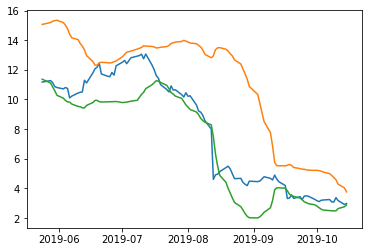

In [9]:
# Get the data for the stock BE by specifying the stock ticker, start date, and end date
df_be = yf.download('BE','2018-07-25','2019-10-16')

df_be = modify_features(df_be)

# Plot the close prices
df_be.Close.plot()
plt.show()

sns.lineplot(data=df_be['Close'][-100:])
sns.lineplot(data=df_be['bollinger_high'][-100:])
sns.lineplot(data=df_be['bollinger_low'][-100:])


df_be.info()
df_be.head()
df_be.tail()


[*********************100%***********************]  1 of 1 downloaded


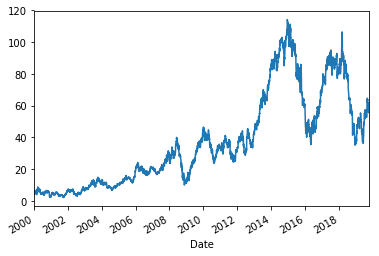

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4978 entries, 2000-01-03 to 2019-10-15
Data columns (total 8 columns):
Open              4978 non-null float64
High              4978 non-null float64
Low               4978 non-null float64
Close             4978 non-null float64
Volume            4978 non-null int64
rolling_mean      4958 non-null float64
bollinger_high    4958 non-null float64
bollinger_low     4958 non-null float64
dtypes: float64(7), int64(1)
memory usage: 350.0 KB


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2000-01-03,4.25,4.25,3.94,3.94,2461900,NaN,NaN,NaN
2000-01-04,3.94,5.00,3.88,4.69,7660300,NaN,NaN,NaN
2000-01-05,4.75,4.75,4.12,4.38,3944600,NaN,NaN,NaN
2000-01-06,4.50,4.69,4.31,4.56,2468400,NaN,NaN,NaN
2000-01-07,4.62,5.62,4.62,5.62,9783000,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-09,56.27,56.97,55.93,56.53,2242800,60.894762,66.294586,55.494937
2019-10-10,56.40,57.82,56.13,57.34,2361600,60.584762,66.240098,54.929426
2019-10-11,58.54,59.28,58.01,58.35,2617800,60.300000,65.720446,54.879554
2019-10-14,59.61,60.23,58.80,59.28,3745100,60.075714,65.177979,54.973450
2019-10-15,59.31,60.94,59.26,60.82,3496580,59.866190,64.695722,55.036659


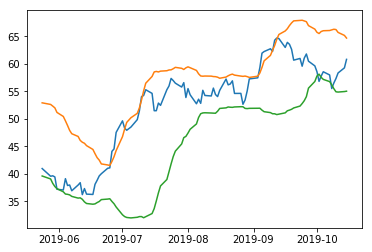

In [10]:
# Get the data for the stock WDC by specifying the stock ticker, start date, and end date
df_wdc = yf.download('WDC','2000-01-01','2019-10-16')


df_wdc = modify_features(df_wdc)

# Plot the close prices
df_wdc.Close.plot()
plt.show()

sns.lineplot(data=df_wdc['Close'][-100:])
sns.lineplot(data=df_wdc['bollinger_high'][-100:])
sns.lineplot(data=df_wdc['bollinger_low'][-100:])


df_wdc.info()
df_wdc.head()
df_wdc.tail()

[*********************100%***********************]  1 of 1 downloaded


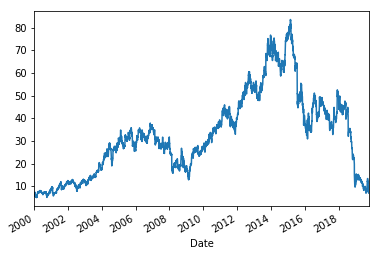

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4978 entries, 2000-01-03 to 2019-10-15
Data columns (total 8 columns):
Open              4978 non-null float64
High              4978 non-null float64
Low               4978 non-null float64
Close             4978 non-null float64
Volume            4978 non-null int64
rolling_mean      4958 non-null float64
bollinger_high    4958 non-null float64
bollinger_low     4958 non-null float64
dtypes: float64(7), int64(1)
memory usage: 350.0 KB


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2000-01-03,6.38,6.44,5.75,5.94,239200,NaN,NaN,NaN
2000-01-04,5.91,6.03,5.72,5.75,175400,NaN,NaN,NaN
2000-01-05,5.77,5.88,5.72,5.88,80600,NaN,NaN,NaN
2000-01-06,5.94,6.25,5.75,5.88,213800,NaN,NaN,NaN
2000-01-07,5.88,6.03,5.75,6.03,155800,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-09,7.27,7.54,7.24,7.39,1930600,10.841905,15.070841,6.612968
2019-10-10,7.35,7.43,7.02,7.03,1240100,10.660000,15.150220,6.169780
2019-10-11,7.21,7.30,7.10,7.12,1345700,10.430000,15.113964,5.746036
2019-10-14,7.02,7.18,6.80,7.09,1277400,10.187619,15.030543,5.344695
2019-10-15,7.04,7.18,6.92,7.07,966194,9.953810,14.912097,4.995522


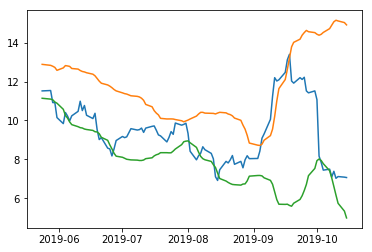

In [11]:
# Get the data for the stock UNFI by specifying the stock ticker, start date, and end date
df_unfi = yf.download('UNFI','2000-01-01','2019-10-16')

df_unfi = modify_features(df_unfi)

# Plot the close prices
df_unfi.Close.plot()
plt.show()

sns.lineplot(data=df_unfi['Close'][-100:])
sns.lineplot(data=df_unfi['bollinger_high'][-100:])
sns.lineplot(data=df_unfi['bollinger_low'][-100:])


df_unfi.info()
df_unfi.head()
df_unfi.tail()

[*********************100%***********************]  1 of 1 downloaded


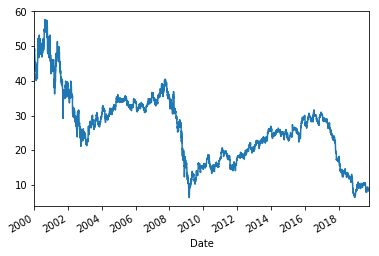

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4978 entries, 2000-01-03 to 2019-10-15
Data columns (total 8 columns):
Open              4978 non-null float64
High              4978 non-null float64
Low               4978 non-null float64
Close             4978 non-null float64
Volume            4978 non-null int64
rolling_mean      4958 non-null float64
bollinger_high    4958 non-null float64
bollinger_low     4958 non-null float64
dtypes: float64(7), int64(1)
memory usage: 350.0 KB


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2000-01-03,49.04,49.26,47.82,48.08,22952500,NaN,NaN,NaN
2000-01-04,47.20,47.44,46.15,46.15,23006200,NaN,NaN,NaN
2000-01-05,46.07,47.12,45.69,46.07,28384500,NaN,NaN,NaN
2000-01-06,45.87,47.10,45.71,46.69,20668100,NaN,NaN,NaN
2000-01-07,47.44,48.68,47.12,48.50,20947000,NaN,NaN,NaN


,Open,High,Low,Close,Volume,rolling_mean,bollinger_high,bollinger_low
Date,,,,,,,,
2019-10-09,8.31,8.37,8.24,8.35,32840800,9.016190,9.739529,8.292852
2019-10-10,8.34,8.52,8.31,8.45,30546100,8.977619,9.755331,8.199907
2019-10-11,8.59,8.92,8.58,8.80,55835000,8.939048,9.709084,8.169011
2019-10-14,8.84,8.85,8.64,8.72,34052700,8.916667,9.668527,8.164807
2019-10-15,8.74,8.92,8.61,8.89,37109257,8.890000,9.624275,8.155725


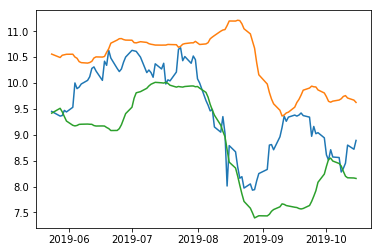

In [12]:
# Get the data for the stock GE by specifying the stock ticker, start date, and end date
df_ge = yf.download('GE','2000-01-01','2019-10-16')

df_ge = modify_features(df_ge)

# Plot the close prices
df_ge.Close.plot()
plt.show()

sns.lineplot(data=df_ge['Close'][-100:])
sns.lineplot(data=df_ge['bollinger_high'][-100:])
sns.lineplot(data=df_ge['bollinger_low'][-100:])

df_ge.info()
df_ge.head()
df_ge.tail()

In [0]:
def get_data_slice_details(df):
  try:
    begin_train = df.index.get_loc('2008-12-31')  + 1
  except:
    begin_train = 1
  
  end_train = df.index.get_loc('2018-12-31')
  begin_valid = end_train+1
  end_valid = df.index.get_loc('2019-05-31')
  begin_test = end_valid+1
  end_test = df.index.get_loc('2019-10-14')
  train_array = df.values[begin_train:end_train,3]
  valid_array = df.values[begin_valid:end_valid,3]
  test_array = df.values[begin_test:end_test,3]

  print(train_array.shape, valid_array.shape, test_array.shape)



  return train_array, valid_array, test_array

#Scale the close data

def scale_all_inputs(train_array, valid_array, test_array):
  sc_model = MinMaxScaler((0, 1))
  train_scaled_array = sc_model.fit_transform(train_array.reshape(-1, 1))
  valid_scaled_array = sc_model.transform(valid_array.reshape(-1, 1))
  test_scaled_array = sc_model.transform(test_array.reshape(-1, 1))
  print(train_scaled_array.shape, valid_scaled_array.shape, test_scaled_array.shape)
  return sc_model, train_scaled_array, valid_scaled_array, test_scaled_array   


# Create data structures with x timesteps and 1 output

def create_data_structures(timesteps, train_array, valid_array, test_array):
  sc_model, train_scaled_array, valid_scaled_array, test_scaled_array = scale_all_inputs(train_array, valid_array, test_array)
  
  
  X_train = []
  y_train = []
  for i in range(timesteps, train_array.shape[0]):
    X_train.append(train_scaled_array[i-timesteps:i,0])
    y_train.append(train_scaled_array[i,0])
  X_train, y_train  = np.array(X_train), np.array(y_train)
  #reshape
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
  print(X_train.shape, y_train.shape)

  X_valid = []
  for i in range(timesteps, timesteps+valid_scaled_array.shape[0]):
    X_valid.append(np.concatenate((train_scaled_array[-timesteps:],valid_scaled_array),0)[i-timesteps:i,0])
  X_valid = np.array(X_valid)
  X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))
  print(X_valid.shape)

  X_test = []
  for i in range(timesteps, timesteps+test_scaled_array.shape[0]):
    X_test.append(np.concatenate((valid_scaled_array[-timesteps:],test_scaled_array),0)[i-timesteps:i,0])
  X_test = np.array(X_test)
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
  print(X_test.shape)

  return sc_model, X_train, y_train, X_valid, X_test

def create_lstm_model(X_train):
  # Initialising the RNN
  regressor = Sequential()

  # Adding the first LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
  regressor.add(Dropout(rate=0.2))

  # Adding a second LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(rate=0.2))

  # Adding a third LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100, return_sequences = True))
  regressor.add(Dropout(rate=0.2))

  # Adding a fourth LSTM layer and some Dropout regularisation
  regressor.add(LSTM(units = 100))
  regressor.add(Dropout(rate=0.2))

  # Adding the output layer
  regressor.add(Dense(units = 1))

  return regressor

In [0]:
def create_plots(df, valid_array, test_array, valid_preds,test_preds):
  plot_data = pd.DataFrame(np.datetime_as_string(df.index.values[-(valid_array.shape[0]+test_array.shape[0]):], unit='D'))
  plot_data.columns = ['date']
  plot_data['date'] = pd.to_datetime(plot_data['date'],format='%Y-%m-%d')
  plot_data['close_price']=np.concatenate((valid_array,test_array),0)
  plot_data['pred_close_price']=np.concatenate((valid_preds[0],test_preds[0]),0)
  plot_data['bollinger_high'] = plot_data['close_price'].rolling(21).mean() - 2*plot_data['close_price'].rolling(21).std()
  plot_data['bollinger_low'] = plot_data['close_price'].rolling(21).mean() + 2*plot_data['close_price'].rolling(21).std()
  plot_data.set_index('date',inplace=True)
  plot_data.info()
  plot_data.head()
  plot_data.tail()
  plt.figure(figsize=(10,10))
  plt.title('Stock Price Prediction')
  plt.xlabel('Date')
  plt.ylabel('Stock Price')
 
  plt.plot(plot_data['close_price'],color='b')
  plt.plot(plot_data['pred_close_price'],'ro--',markersize=2)
  plt.plot(plot_data['bollinger_high'])
  plt.plot(plot_data['bollinger_low'])
  plt.legend()
  return plot_data



(2515,) (103,) (93,)
(2515, 1) (103, 1) (93, 1)
(2485, 30, 1) (2485,)
(103, 30, 1)
(93, 30, 1)




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





2485/2485 [==============================] - 12s 5ms/step - loss: 0.0727
Epoch 2/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0092
Epoch 3/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0044
Epoch 4/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0068
Epoch 5/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0044
Epoch 6/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0050
Epoch 7/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0046
Epoch 8/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0051
Epoch 9/10

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196 entries, 2019-01-07 to 2019-10-15
Data columns (total 2 columns):
close_price         196 non-null float64
pred_close_price    196 non-null float32
dtypes: float32(1), float64(1)
memory usage: 3.8 KB


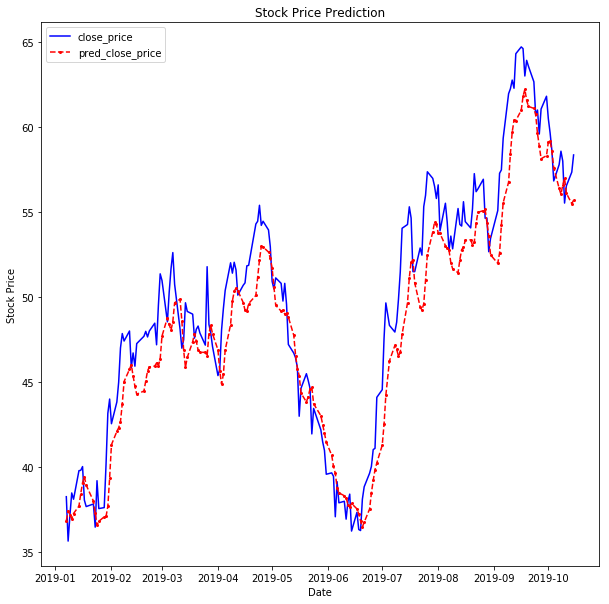

In [15]:
train_wdc, valid_wdc, test_wdc = get_data_slice_details(df_wdc)
sc_wdc, X_train_wdc, y_train_wdc, X_valid_wdc, X_test_wdc = create_data_structures(30, train_wdc, valid_wdc, test_wdc)

# Create an LSTM regressor
regressor_wdc = create_lstm_model(X_train_wdc)
# Compiling the RNN
regressor_wdc.compile(optimizer = 'nadam', loss = 'mean_squared_error')

epoch_trials = [100]
batch_size_trials = [128]

reg_models_wdc = []

# Fitting the RNN to the Training set
for n_epochs in epoch_trials:
  for b_size in batch_size_trials:
    regressor_wdc.fit(X_train_wdc, y_train_wdc, epochs = n_epochs, batch_size = b_size)
    reg_models_wdc.append(regressor_wdc)

valid_preds_wdc = []
test_preds_wdc = []
for reg_model in reg_models_wdc:
  valid_preds_wdc.append(sc_wdc.inverse_transform(reg_model.predict(X_valid_wdc)))
  test_preds_wdc.append(sc_wdc.inverse_transform(reg_model.predict(X_test_wdc)))

plot_wdc = create_plots(df_wdc, valid_wdc, test_wdc, valid_preds_wdc, test_preds_wdc)

(2515,) (103,) (93,)
(2515, 1) (103, 1) (93, 1)
(2485, 30, 1) (2485,)
(103, 30, 1)
(93, 30, 1)
Epoch 1/100
2485/2485 [==============================] - 8s 3ms/step - loss: 0.0779
Epoch 2/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0103
Epoch 3/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0057
Epoch 4/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0039
Epoch 5/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0035
Epoch 6/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0034
Epoch 7/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0033
Epoch 8/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0035
Epoch 9/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0033
Epoch 10/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0031
Epoch 11/100
2485/2485 [==============================] - 5s 2ms

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196 entries, 2019-01-07 to 2019-10-15
Data columns (total 2 columns):
close_price         196 non-null float64
pred_close_price    196 non-null float32
dtypes: float32(1), float64(1)
memory usage: 3.8 KB


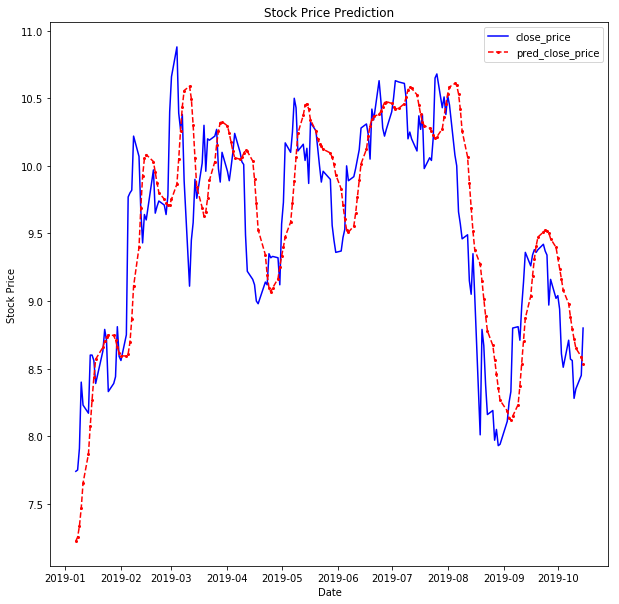

In [16]:
train_ge, valid_ge, test_ge = get_data_slice_details(df_ge)
sc_ge, X_train_ge, y_train_ge, X_valid_ge, X_test_ge = create_data_structures(30, train_ge, valid_ge, test_ge)

# Create an LSTM regressor
regressor_ge = create_lstm_model(X_train_ge)
# Compiling the RNN
regressor_ge.compile(optimizer = 'adam', loss = 'mean_squared_error')

epoch_trials = [100]
batch_size_trials = [128]

reg_models_ge = []

# Fitting the RNN to the Training set
for n_epochs in epoch_trials:
  for b_size in batch_size_trials:
    regressor_ge.fit(X_train_ge, y_train_ge, epochs = n_epochs, batch_size = b_size)
    reg_models_ge.append(regressor_ge)

valid_preds_ge = []
test_preds_ge = []
for reg_model in reg_models_ge:
  valid_preds_ge.append(sc_ge.inverse_transform(reg_model.predict(X_valid_ge)))
  test_preds_ge.append(sc_ge.inverse_transform(reg_model.predict(X_test_ge)))

plot_ge = create_plots(df_ge, valid_ge, test_ge, valid_preds_ge, test_preds_ge)

(2515,) (103,) (93,)
(2515, 1) (103, 1) (93, 1)
(2485, 30, 1) (2485,)
(103, 30, 1)
(93, 30, 1)
Epoch 1/100
2485/2485 [==============================] - 9s 3ms/step - loss: 0.0705
Epoch 2/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0077
Epoch 3/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0073
Epoch 4/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0056
Epoch 5/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0052
Epoch 6/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0045
Epoch 7/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0047
Epoch 8/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0051
Epoch 9/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0033
Epoch 10/100
2485/2485 [==============================] - 5s 2ms/step - loss: 0.0055
Epoch 11/100
2485/2485 [==============================] - 5s 2ms

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196 entries, 2019-01-07 to 2019-10-15
Data columns (total 4 columns):
close_price         196 non-null float64
pred_close_price    196 non-null float32
bollinger_high      176 non-null float64
bollinger_low       176 non-null float64
dtypes: float32(1), float64(3)
memory usage: 6.9 KB


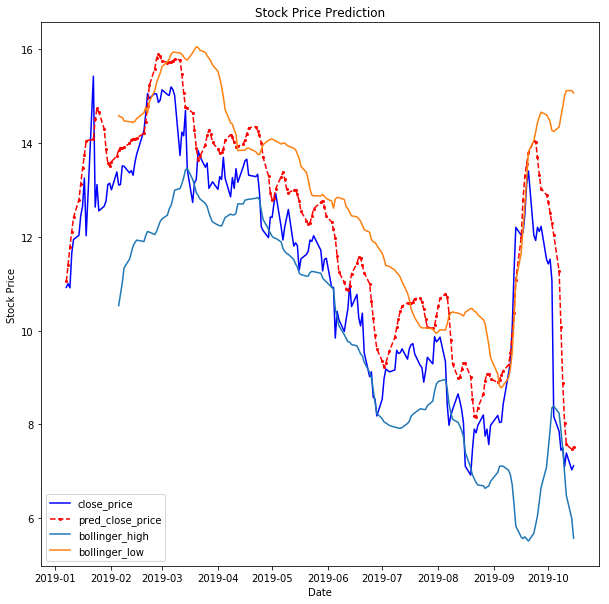

In [18]:
train_unfi, valid_unfi, test_unfi = get_data_slice_details(df_unfi)
sc_unfi, X_train_unfi, y_train_unfi, X_valid_unfi, X_test_unfi = create_data_structures(30, train_unfi, valid_unfi, test_unfi)

# Create an LSTM regressor
regressor_unfi = create_lstm_model(X_train_unfi)
# Compiling the RNN
regressor_unfi.compile(optimizer = 'nadam', loss = 'mean_squared_error')

epoch_trials = [100]
batch_size_trials = [128]

reg_models_unfi = []

# Fitting the RNN to the Training set
for n_epochs in epoch_trials:
  for b_size in batch_size_trials:
    regressor_unfi.fit(X_train_unfi, y_train_unfi, epochs = n_epochs, batch_size = b_size)
    reg_models_unfi.append(regressor_unfi)




valid_preds_unfi = []
test_preds_unfi = []
for reg_model in reg_models_unfi:
  valid_preds_unfi.append(sc_unfi.inverse_transform(reg_model.predict(X_valid_unfi)))
  test_preds_unfi.append(sc_unfi.inverse_transform(reg_model.predict(X_test_unfi)))



plot_unfi = create_plots(df_unfi, valid_unfi, test_unfi, valid_preds_unfi, test_preds_unfi)

(108,) (103,) (93,)
(108, 1) (103, 1) (93, 1)
(78, 30, 1) (78,)
(103, 30, 1)
(93, 30, 1)
Epoch 1/100
78/78 [==============================] - 4s 54ms/step - loss: 0.3030
Epoch 2/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1191
Epoch 3/100
78/78 [==============================] - 0s 3ms/step - loss: 0.4136
Epoch 4/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1483
Epoch 5/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1247
Epoch 6/100
78/78 [==============================] - 0s 3ms/step - loss: 0.1028
Epoch 7/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0779
Epoch 8/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0532
Epoch 9/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0392
Epoch 10/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0344
Epoch 11/100
78/78 [==============================] - 0s 3ms/step - loss: 0.0329
Epoch 12/100
78/78 [========

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196 entries, 2019-01-07 to 2019-10-15
Data columns (total 4 columns):
close_price         196 non-null float64
pred_close_price    196 non-null float32
bollinger_high      176 non-null float64
bollinger_low       176 non-null float64
dtypes: float32(1), float64(3)
memory usage: 6.9 KB


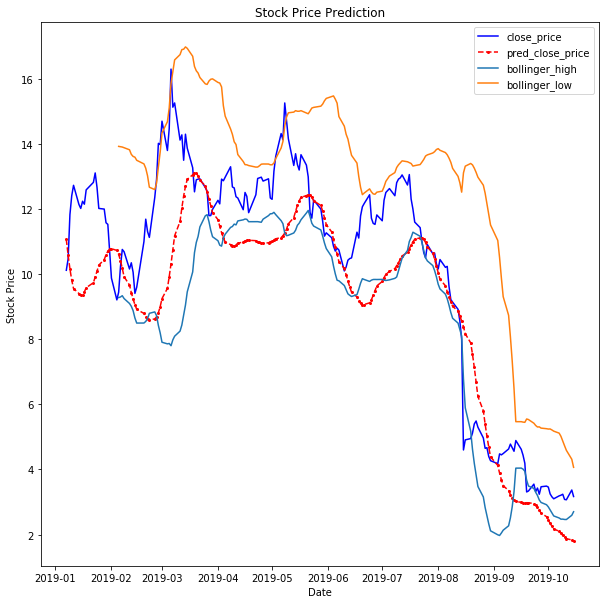

In [19]:
train_be, valid_be, test_be = get_data_slice_details(df_be)
sc_be, X_train_be, y_train_be, X_valid_be, X_test_be = create_data_structures(30, train_be, valid_be, test_be)

# Create an LSTM regressor
regressor_be = create_lstm_model(X_train_be)
# Compiling the RNN
regressor_be.compile(optimizer = 'nadam', loss = 'mean_squared_error')

epoch_trials = [100]
batch_size_trials = [128]

reg_models_be = []

# Fitting the RNN to the Training set
for n_epochs in epoch_trials:
  for b_size in batch_size_trials:
    regressor_be.fit(X_train_be, y_train_be, epochs = n_epochs, batch_size = b_size)
    reg_models_be.append(regressor_be)




valid_preds_be = []
test_preds_be = []
for reg_model in reg_models_be:
  valid_preds_be.append(sc_be.inverse_transform(reg_model.predict(X_valid_be)))
  test_preds_be.append(sc_be.inverse_transform(reg_model.predict(X_test_be)))



plot_be = create_plots(df_be, valid_be, test_be, valid_preds_be, test_preds_be)

In [0]:
reg_models_ge[0].save('reg_model_ge.hdf5')
reg_models_wdc[0].save('reg_model_wdc.hdf5')
reg_models_unfi[0].save('reg_model_unfi.hdf5')
reg_models_be[0].save('reg_model_be.hdf5')